In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./raw/articles/articles.csv', parse_dates=['create_dttm'])
print(df.shape)
df.head(4)

(1873, 7)


,title,text,create_dttm,link,site,sentiment,ethics
0,Инвалидам перекрыли входы в кафе и магазины Кр...,\n Магазины и кафе Кронштадта оказались недост...,2018-01-23 13:16:00,https://moika78.ru/news/2018-01-23/12164-inval...,moika78,0.0,NaN
1,Петербургские инвалиды не хотят хвалить метроп...,Оказывать помощь некоторым группам инвалидам н...,2018-01-30 15:53:00,https://moika78.ru/news/2018-01-30/13170-peter...,moika78,NaN,NaN
2,Петербургских родителей детей-инвалидов поддер...,\n Горячая линия для родителей детей с инвали...,2018-01-31 13:12:00,https://moika78.ru/news/2018-01-31/13312-peter...,moika78,NaN,NaN
3,В Петербурге оштрафовали «Мираж Синема» за отк...,Роспотребнадзор по Санкт-Петербургу оштрафовал...,2018-02-14 13:38:00,https://moika78.ru/news/2018-02-14/14985-v-pet...,moika78,NaN,NaN


In [3]:
from nltk.corpus import stopwords
stopwords = stopwords.words('russian')


def preprocess_text(text: str) -> str:
    is_allowed = lambda c: c.isalpha() or c.isdigit() or c == ' '
    text = ''.join(list(filter(is_allowed, text)))
    # text = text.lower()
    text = text.split()
    text = list(filter(lambda word: word not in stopwords, text))
    text = ' '.join(text)
    return text

df = df.assign(title=df.title.apply(preprocess_text),
               text=df.text.apply(preprocess_text))

df.head(3)

,title,text,create_dttm,link,site,sentiment,ethics
0,Инвалидам перекрыли входы кафе магазины Кроншт...,Магазины кафе Кронштадта оказались недоступны ...,2018-01-23 13:16:00,https://moika78.ru/news/2018-01-23/12164-inval...,moika78,0.0,NaN
1,Петербургские инвалиды хотят хвалить метрополитен,Оказывать помощь некоторым группам инвалидам с...,2018-01-30 15:53:00,https://moika78.ru/news/2018-01-30/13170-peter...,moika78,NaN,NaN
2,Петербургских родителей детейинвалидов поддерж...,Горячая линия родителей детей инвалидностью на...,2018-01-31 13:12:00,https://moika78.ru/news/2018-01-31/13312-peter...,moika78,NaN,NaN


# самые популярные слова

In [4]:
from collections import Counter
from nltk.stem import SnowballStemmer

In [5]:
stemmer = SnowballStemmer(language='russian')

In [6]:
def stem(text: str) -> str:
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

df = df.assign(title_stem=df.title.apply(stem),
               text_stem=df.text.apply(stem))
df.head()

,title,text,create_dttm,link,site,sentiment,ethics,title_stem,text_stem
0,Инвалидам перекрыли входы кафе магазины Кроншт...,Магазины кафе Кронштадта оказались недоступны ...,2018-01-23 13:16:00,https://moika78.ru/news/2018-01-23/12164-inval...,moika78,0.0,NaN,инвалид перекр вход каф магазин кронштадт,магазин каф кронштадт оказа недоступн инвалид ...
1,Петербургские инвалиды хотят хвалить метрополитен,Оказывать помощь некоторым группам инвалидам с...,2018-01-30 15:53:00,https://moika78.ru/news/2018-01-30/13170-peter...,moika78,NaN,NaN,петербургск инвалид хот хвал метрополит,оказыва помощ некотор групп инвалид станц метр...
2,Петербургских родителей детейинвалидов поддерж...,Горячая линия родителей детей инвалидностью на...,2018-01-31 13:12:00,https://moika78.ru/news/2018-01-31/13312-peter...,moika78,NaN,NaN,петербургск родител детейинвалид поддержат спе...,горяч лин родител дет инвалидн нача работ пете...
3,В Петербурге оштрафовали Мираж Синема отказ об...,Роспотребнадзор СанктПетербургу оштрафовали ки...,2018-02-14 13:38:00,https://moika78.ru/news/2018-02-14/14985-v-pet...,moika78,NaN,NaN,в петербург оштрафова мираж синем отказ обслуж...,роспотребнадзор санктпетербург оштрафова кинот...
4,Люди каменного века относились инвалидам уваже...,Первобытные люди жившие территории современной...,2018-02-16 20:24:00,https://moika78.ru/news/2018-02-16/15298-lyudi...,moika78,NaN,NaN,люд камен век относ инвалид уважен,первобытн люд живш территор современ росс отно...


## count in title+text

In [7]:
def count_words(df) -> Counter:
    word2doc_counter = Counter()

    cols = ['title_stem', 'text_stem']
    for title, text in df[cols].to_records(index=False):
        doc_uniq_words = Counter(set((title + ' ' + text).split()))
        word2doc_counter += doc_uniq_words
    
    return word2doc_counter


def counter_to_file(counter: Counter, path: str):
    with open(path, 'w') as f:
        f.write('\n'.join(f'{k} {v}' for k, v in counter.most_common()))

In [9]:
# all sites
counter_to_file(count_words(df), f'./processed/word_counts_title_text_stemmed.txt')

for site in list(df.site.unique()):
    print(site)
    counter_to_file(count_words(df[df.site == site]), f'./processed/{site}/word_counts_title_text_stemmed.txt')

moika78
spbdnevnik
fontanka


In [10]:
t = ' '.join(df.title + ' ' + df.text)
set(filter(lambda word: word.startswith('писа'), t.split()))

{'писал',
 'писала',
 'писалао',
 'писалапро',
 'писали',
 'писало',
 'писателей',
 'писателем',
 'писатель',
 'писательница',
 'писательницы',
 'писательского',
 'писать',
 'писатьТеперь'}

## count in title

In [11]:
def count_words(df) -> Counter:
    word2doc_counter = Counter()

    cols = ['title_stem']
    for title in list(df[cols].to_records(index=False)):
        title = title[0]
        doc_uniq_words = Counter(set(title.split()))
        word2doc_counter += doc_uniq_words
    
    return word2doc_counter

In [12]:
# all sites
counter_to_file(count_words(df), f'./processed/word_counts_title_stemmed.txt')

for site in list(df.site.unique()):
    print(site)
    counter_to_file(count_words(df[df.site == site]), f'./processed/{site}/word_counts_title_stemmed.txt')

moika78
spbdnevnik
fontanka


In [21]:
from deeppavlov import build_model, configs
from tqdm import tqdm
import numpy as np

# NER

In [150]:
# !python3 -m deeppavlov install ner_ontonotes

In [151]:


ner_model = build_model(configs.ner.ner_rus_bert, download=True)

2023-05-23 23:51:14.443 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/v1/ner/ner_rus_bert_torch_new.tar.gz download because of matching hashes
Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you ex

In [152]:
from tqdm import tqdm

is_named_entity = lambda pair: pair[1] != 'O'

named_entities_per_doc = []

cols = ['title', 'text']
for title, text in tqdm(df[cols].to_records(index=False), total=len(df)):
    text = title + '. ' + text
    
    res = []
    # bert limit is 512 tokens
    k = 200
    for i in range(0, len(text.split()), k):
        text_batch = ' '.join(text.split()[i:i+k])

        try:
            pred = ner_model([text_batch])
        except Exception as e:
            print(f'err at text tokens={len(text.split())} batch tokens = {len(text_batch.split())}\n{text_batch}')
            raise e

        word_x_pos = list(zip(pred[0][0], pred[1][0]))
        word_x_pos = list(filter(is_named_entity, word_x_pos))
        res += word_x_pos
    
    named_entities_per_doc.append(res)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1873/1873 [28:48<00:00,  1.08it/s]


In [160]:
def count_by_pos_tag(named_entities_per_doc: list, pos_tag: str = 'PER') -> Counter:

    is_person = lambda pair: pos_tag in pair[1]
    pers_stemmed = [list(filter(is_person, doc)) for doc in named_entities_per_doc]
    pers_stemmed = [set([stemmer.stem(name) for name, pos_tag in doc]) for doc in pers_stemmed]

    pers_counter = Counter()

    for doc in pers_stemmed:
        doc_uniq_pers = Counter(doc)
        pers_counter += doc_uniq_pers
    return pers_counter

## per

In [161]:
pers_counter = count_by_pos_tag(named_entities_per_doc, 'PER')
counter_to_file(pers_counter, './processed/persons_counts_title_text_stemmed.txt')
pers_counter.most_common(10)

[('александр', 336),
 ('ан', 169),
 ('бегл', 121),
 ('брусилов', 114),
 ('владимир', 102),
 ('андр', 80),
 ('миха', 80),
 ('натал', 77),
 ('серг', 69),
 ('дмитр', 68)]

In [162]:
for site in list(df.site.unique()):
    print(site)
    site_df = df[df.site == site]
    site_docs_ids = set(site_df.index.tolist())
    
    ner_per_doc_per_site = []
    for i, ner in enumerate(named_entities_per_doc):
        if i in site_docs_ids:
            ner_per_doc_per_site.append(ner)

    pers_counter = count_by_pos_tag(ner_per_doc_per_site, 'PER')
    counter_to_file(pers_counter, f'./processed/{site}/persons_counts_title_text_stemmed.txt')
    # pers_counter.most_common(10)

moika78
spbdnevnik
fontanka


## org

In [163]:
pers_counter = count_by_pos_tag(named_entities_per_doc, 'ORG')
counter_to_file(pers_counter, './processed/organizations_counts_title_text_stemmed.txt')
pers_counter.most_common(10)

[('фонд', 358),
 ('центр', 288),
 ('комитет', 252),
 ('санктпетербург', 229),
 ('благотворительн', 180),
 ('мойка78', 159),
 ('сми', 147),
 ('социальн', 137),
 ('инвалид', 129),
 ('фонтанк', 127)]

In [164]:
for site in list(df.site.unique()):
    print(site)
    site_df = df[df.site == site]
    site_docs_ids = set(site_df.index.tolist())
    
    ner_per_doc_per_site = []
    for i, ner in enumerate(named_entities_per_doc):
        if i in site_docs_ids:
            ner_per_doc_per_site.append(ner)

    pers_counter = count_by_pos_tag(ner_per_doc_per_site, 'ORG')
    counter_to_file(pers_counter, f'./processed/{site}/organizations_counts_title_text_stemmed.txt')
    # pers_counter.most_common(10)

moika78
spbdnevnik
fontanka


## loc

In [165]:
pers_counter = count_by_pos_tag(named_entities_per_doc, 'LOC')
counter_to_file(pers_counter, './processed/locations_counts_title_text_stemmed.txt')
pers_counter.most_common(10)

[('петербург', 957),
 ('росс', 619),
 ('район', 423),
 ('санктпетербург', 310),
 ('рф', 204),
 ('москв', 172),
 ('област', 171),
 ('северн', 129),
 ('столиц', 117),
 ('ленинградск', 99)]

In [166]:
for site in list(df.site.unique()):
    print(site)
    site_df = df[df.site == site]
    site_docs_ids = set(site_df.index.tolist())
    
    ner_per_doc_per_site = []
    for i, ner in enumerate(named_entities_per_doc):
        if i in site_docs_ids:
            ner_per_doc_per_site.append(ner)

    pers_counter = count_by_pos_tag(ner_per_doc_per_site, 'LOC')
    counter_to_file(pers_counter, f'./processed/{site}/locations_counts_title_text_stemmed.txt')
    # pers_counter.most_common(10)

moika78
spbdnevnik
fontanka


# text embeddings

In [17]:
model = build_model(configs.embedder.bert_embedder, download=False)

Some weights of the model checkpoint at /Users/i.shamov/.deeppavlov/downloads/bert_models/multi_cased_L-12_H-768_A-12_pt were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
cols = ['title', 'text']
embs = []

for title, text in tqdm(df[cols].to_records(index=False), total=len(df)):
    text = title + '. ' + text
    
    res = []
    # bert limit is 512 tokens
    k = 170
    for i in range(0, len(text.split()), k):
        text_batch = ' '.join(text.split()[i:i+k])
        try:
            tokens, token_embs, subtokens, subtoken_embs, sent_max_embs, sent_mean_embs, bert_pooler_outputs = model([text_batch])
            res.append(sent_mean_embs)
        except Exception as e:
            print(f'err at text tokens={len(text.split())} batch tokens = {len(text_batch.split())}\n{text_batch}')
            # raise e
  
    if len(res) == 1:
        res = res[0]
    else:
        res = np.array(res).squeeze().mean(axis=0)

    embs.append(sent_mean_embs)

 21%|██████████████████▋                                                                      | 392/1873 [06:03<35:10,  1.42s/it]

err at text tokens=219 batch tokens = 170
Как получить дополнительные выходные уходу ребенкоминвалидом. Заместитель управляющего СанктПетербургским региональным отделением Фонда социального страхования Наталья Колшенская отвечает вопрос читателя Петербургского дневникаЗаместитель управляющего СанктПетербургским региональным отделением Фонда социального страхования Наталья Колшенская отвечает вопрос читателя Петербургского дневника Яосуществляю уход заребенкоминвалидом Слышала чтомогу воспользоваться правом напредоставление дополнительных оплачиваемых выходных дней дляухода заребенкоминвалидом Каким образом ямогу этосделать какие документы следует предъявить работодателю Предоставление дополнительных оплачиваемых выходных дней ухода детьмиинвалидами регулируетсяправилами утвержденными постановлением правительства РФ от13102014 1048Одному изродителей опекуну попечителю предоставляются поего заявлению четыре дополнительных оплачиваемых выходных дня вкалендарном месяце Периодичность подачи

100%|████████████████████████████████████████████████████████████████████████████████████████| 1873/1873 [47:27<00:00,  1.52s/it]


# sentiment bert+mlp

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np

In [24]:
embs_arr = np.array(embs).squeeze()
print(embs_arr.shape)

model = MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(300, 100), max_iter=1000))

(1873, 768)


In [25]:
train_embs = embs_arr[~df.sentiment.isna()]
y = np.array(df[~df.sentiment.isna()].sentiment).reshape(-1, 1)
len(train_embs), len(train_embs)

(108, 108)

In [26]:
model.fit(train_embs, y)

pred_label = model.predict(embs_arr)
df = df.assign(sentiment_predicted=pred_label.astype(int))
df.head()

,title,text,create_dttm,link,site,sentiment,ethics,title_stem,text_stem,sentiment_predicted
0,Инвалидам перекрыли входы кафе магазины Кроншт...,Магазины кафе Кронштадта оказались недоступны ...,2018-01-23 13:16:00,https://moika78.ru/news/2018-01-23/12164-inval...,moika78,0.0,NaN,инвалид перекр вход каф магазин кронштадт,магазин каф кронштадт оказа недоступн инвалид ...,0
1,Петербургские инвалиды хотят хвалить метрополитен,Оказывать помощь некоторым группам инвалидам с...,2018-01-30 15:53:00,https://moika78.ru/news/2018-01-30/13170-peter...,moika78,NaN,NaN,петербургск инвалид хот хвал метрополит,оказыва помощ некотор групп инвалид станц метр...,0
2,Петербургских родителей детейинвалидов поддерж...,Горячая линия родителей детей инвалидностью на...,2018-01-31 13:12:00,https://moika78.ru/news/2018-01-31/13312-peter...,moika78,NaN,NaN,петербургск родител детейинвалид поддержат спе...,горяч лин родител дет инвалидн нача работ пете...,0
3,В Петербурге оштрафовали Мираж Синема отказ об...,Роспотребнадзор СанктПетербургу оштрафовали ки...,2018-02-14 13:38:00,https://moika78.ru/news/2018-02-14/14985-v-pet...,moika78,NaN,NaN,в петербург оштрафова мираж синем отказ обслуж...,роспотребнадзор санктпетербург оштрафова кинот...,0
4,Люди каменного века относились инвалидам уваже...,Первобытные люди жившие территории современной...,2018-02-16 20:24:00,https://moika78.ru/news/2018-02-16/15298-lyudi...,moika78,NaN,NaN,люд камен век относ инвалид уважен,первобытн люд живш территор современ росс отно...,0


array([[<Axes: title={'center': 'sentiment'}>,
        <Axes: title={'center': 'ethics'}>],
       [<Axes: title={'center': 'sentiment_predicted'}>, <Axes: >]],
      dtype=object)

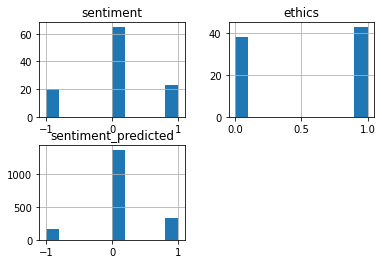

In [27]:
df.hist()

# sentiment tfidf+logreg

In [218]:
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.svm import LinearSVC
# from sklearn.feature_extraction.text import TfidfVectorizer
# import numpy as np

# vectorizer = TfidfVectorizer()
# model = MultiOutputClassifier(LinearSVC())

# train = df[~df.sentiment.isna()]
# len(train)

# texts = train.title_stem + train.text_stem
# y = np.array(train.sentiment).reshape(-1, 1)

# vectorizer.fit(texts)
# vecs = vectorizer.transform(texts)

# model.fit(vecs, y)

# pred_label = model.predict(vectorizer.transform(df.title_stem + df.text_stem))
# df = df.assign(sentiment_predicted=pred_label.astype(int))
# df.head()

# ethics bert + mlp

In [28]:
embs_arr = np.array(embs).squeeze()
print(embs_arr.shape)

model = MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(300, 100), max_iter=1000))

(1873, 768)


In [29]:
train_embs = embs_arr[~df.ethics.isna()]
y = np.array(df[~df.ethics.isna()].ethics).reshape(-1, 1)
len(train_embs), len(train_embs)

(81, 81)

In [30]:
model.fit(train_embs, y)

pred_label = model.predict(embs_arr)
df = df.assign(ethics_predicted=pred_label.astype(int))
df.head()

,title,text,create_dttm,link,site,sentiment,ethics,title_stem,text_stem,sentiment_predicted,ethics_predicted
0,Инвалидам перекрыли входы кафе магазины Кроншт...,Магазины кафе Кронштадта оказались недоступны ...,2018-01-23 13:16:00,https://moika78.ru/news/2018-01-23/12164-inval...,moika78,0.0,NaN,инвалид перекр вход каф магазин кронштадт,магазин каф кронштадт оказа недоступн инвалид ...,0,1
1,Петербургские инвалиды хотят хвалить метрополитен,Оказывать помощь некоторым группам инвалидам с...,2018-01-30 15:53:00,https://moika78.ru/news/2018-01-30/13170-peter...,moika78,NaN,NaN,петербургск инвалид хот хвал метрополит,оказыва помощ некотор групп инвалид станц метр...,0,1
2,Петербургских родителей детейинвалидов поддерж...,Горячая линия родителей детей инвалидностью на...,2018-01-31 13:12:00,https://moika78.ru/news/2018-01-31/13312-peter...,moika78,NaN,NaN,петербургск родител детейинвалид поддержат спе...,горяч лин родител дет инвалидн нача работ пете...,0,1
3,В Петербурге оштрафовали Мираж Синема отказ об...,Роспотребнадзор СанктПетербургу оштрафовали ки...,2018-02-14 13:38:00,https://moika78.ru/news/2018-02-14/14985-v-pet...,moika78,NaN,NaN,в петербург оштрафова мираж синем отказ обслуж...,роспотребнадзор санктпетербург оштрафова кинот...,0,0
4,Люди каменного века относились инвалидам уваже...,Первобытные люди жившие территории современной...,2018-02-16 20:24:00,https://moika78.ru/news/2018-02-16/15298-lyudi...,moika78,NaN,NaN,люд камен век относ инвалид уважен,первобытн люд живш территор современ росс отно...,0,1


array([[<Axes: title={'center': 'sentiment'}>,
        <Axes: title={'center': 'ethics'}>],
       [<Axes: title={'center': 'sentiment_predicted'}>,
        <Axes: title={'center': 'ethics_predicted'}>]], dtype=object)

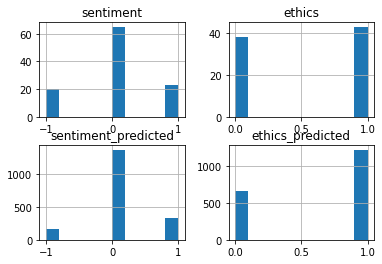

In [31]:
df.hist()

# save

In [32]:
# df.to_csv('./processed/articles_predicted.csv', index=False)

In [33]:
save_df = df.drop(['title_stem', 'text_stem'], axis=1)
save_df = save_df.assign(text=df.text.apply(lambda t: t[:32766]))

save_df.to_excel('./processed/articles_predicted.xls', index=False)

/var/folders/xh/q37khl051cq8pp1989f25fhh0000gp/T/ipykernel_44390/24798303.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  save_df.to_excel('./processed/articles_predicted.xls', index=False)
